In [1]:
import numpy as np
import codecs
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import StratifiedKFold
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt


# 1 travailler sur le corpus
# 2 Voir dans les classifieurs l'option dans les cas où les donnes sont unbalanced
# 3 Travailler sur le resultat, travail sur la REC/courbe ROC
list_stopwords = stopwords.words('french')
list_stopwords_english = stopwords.words('english')
print(list_stopwords)


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [5]:
#Recuperation 
fname = './president/corpus.tache1.learn.utf8'


alltxts = []
labs = []
s=codecs.open(fname, 'r','utf-8') # pour régler le codage

cpt = 0

nblignes = 57000
cptM= 0
cptC=0
for i in range(nblignes):
    txt = s.readline()
    #print txt

    lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
    txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)

    #assert(lab == "C" or lab == "M")

    if lab.count('M') >0 and cptM < 7506:
        cptM +=1
        labs.append(-1)
        alltxts.append(txt)
    elif lab.count('C') >0 and cptC < 7506:
        cptC+=1
        labs.append(1)
        alltxts.append(txt)
    

    cpt += 1

print(cptM)
print(cptC)

alltxts = np.array(alltxts)
labs = np.array(labs)

0.1316842105263158
0.1316842105263158


In [6]:
#Determination du meilleur modele sans tfidf
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(500,1000,2000,10000,30000,50000,70000,80000,100000),
             'clf__alpha': (1,1e-2, 1e-3),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)
print(gs_clf.predict(alltxts[:10]))

print(confusion_matrix(labs_test,gs_clf.predict(test)))

KeyboardInterrupt: 

In [4]:
#Determination du meilleur modele sans tfidf
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB(class_prior=(0.8,0.2))),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(10000,30000,50000,70000,80000,100000),
             'clf__alpha': (1,1e-2, 1e-3),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)
print(gs_clf.predict(alltxts[:10]))

print(confusion_matrix(labs_test,gs_clf.predict(test)))

0.7648431068100642
{'clf__alpha': 0.01, 'vect__lowercase': False, 'vect__max_features': 70000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
{'mean_fit_time': array([0.92592649, 1.05498114, 1.84686456, 2.28549395, 1.53868828,
       1.93044229, 1.06914296, 1.29713435, 2.22685046, 2.60543857,
       1.88316865, 2.05351377, 1.21435566, 1.25345058, 2.22086539,
       2.66568027, 1.94181089, 2.0880219 , 1.19680257, 1.20956864,
       2.34274049, 2.69320455, 1.90969763, 2.12073016, 1.11821203,
       1.25704265, 2.24799385, 2.73369594, 1.90411224, 2.15005469,
       1.12040572, 1.21056533, 2.26195641, 2.51089053, 1.75211835,
       2.1199358 , 1.182441  , 1.17326508, 2.26534672, 2.64952106,
       1.89074926, 2.10098677, 1.1337719 , 1.14334545, 2.32558618,
       2.58648977, 1.87439146, 2.05411086, 0.95345206, 1.1575068 ,
       2.28290119, 2.68602319, 1.91887269, 2.13808742, 1.11900949,
       1.21814532, 2.29008107, 2.68263311, 1.96335373, 2.15723629,
       1.09986086, 1.2087705

NameError: name 'labs_test' is not defined

In [34]:
#Determination du meilleur modele avec tfidf
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC()),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(10000,30000,50000,75000,100000),
              'tfidf__use_idf':(True,False),
             'clf__class_weight': ('balanced',None),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)
print(gs_clf.predict(alltxts[:10]))

print(confusion_matrix(labs_test,gs_clf.predict(test)))

C:\Users\arnau\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8584196318587728
{'clf__class_weight': 'balanced', 'tfidf__use_idf': True, 'vect__lowercase': True, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
{'mean_fit_time': array([1.53633897, 1.46033422, 4.82682546, 5.13999017, 4.32423059,
       4.13317927, 1.64062818, 1.55499268, 5.76636116, 5.76320346,
       4.79038429, 4.70004503, 1.68603086, 1.80106529, 5.26023555,
       5.94337821, 4.63927499, 4.20899932, 1.53533276, 1.70966689,
       5.21617683, 5.7967511 , 4.71827968, 4.08913469, 1.79799271,
       1.48666732, 6.17859101, 5.94692278, 4.76611606, 4.2898368 ,
       1.57507555, 1.6301984 , 5.43264302, 5.37930568, 4.60886955,
       3.96733165, 1.76500225, 1.50233126, 5.70400079, 5.19166748,
       4.74730078, 4.19023212, 1.56522202, 1.59833789, 5.60517756,
       5.48326262, 4.67208838, 4.37642741, 1.76708325, 1.49821202,
       6.63266571, 6.01933225, 4.807     , 4.52666656, 1.57499973,
       1.67366536, 5.60466623, 6.09466465, 4.91293494, 4.03

In [35]:
#Determination du meilleur modele avec tfidf
from sklearn.tree import DecisionTreeClassifier

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', DecisionTreeClassifier()),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(10000,30000,50000,75000,100000),
              'tfidf__use_idf':(True,False),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)
print(gs_clf.predict(alltxts[:10]))

print(confusion_matrix(labs_test,gs_clf.predict(test)))

C:\Users\arnau\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.6712467212923406
{'tfidf__use_idf': False, 'vect__lowercase': False, 'vect__max_features': 30000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
{'mean_fit_time': array([2.33330043, 2.38991292, 6.34631284, 6.4041063 , 5.11574213,
       4.74993396, 2.97305346, 2.92760388, 7.28770757, 7.39964811,
       5.36144161, 5.53621968, 3.00930874, 3.0318741 , 7.80202373,
       7.8225464 , 5.69355639, 6.38581022, 2.9791131 , 2.99561516,
       8.3407414 , 8.17064349, 6.55483834, 6.67709176, 2.97507604,
       2.80458689, 9.21782049, 8.94023045, 6.78126597, 7.2569174 ,
       2.44385815, 2.43034164, 6.95790617, 6.56813717, 5.24881411,
       4.98316956, 2.85899464, 3.00802072, 7.67737063, 7.50539343,
       5.28535748, 5.64249118, 3.07458552, 3.08373642, 8.47482761,
       7.95181958, 5.77010862, 6.11258046, 3.50494417, 2.8644224 ,
       8.41879988, 8.1325326 , 6.54448899, 6.69369221, 3.14653238,
       3.02713927, 9.5633324 , 8.88779998, 7.62177157, 7.32192691,
       2.82033205, 2.85

In [36]:
#Determination du meilleur modele avec tfidf
from sklearn.ensemble import RandomForestClassifier

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier()),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(10000,30000,50000,75000,100000),
              'tfidf__use_idf':(True,False),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)
print(gs_clf.predict(alltxts[:10]))

print(confusion_matrix(labs_test,gs_clf.predict(test)))

C:\Users\arnau\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\arnau\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.660723328989477
{'tfidf__use_idf': True, 'vect__lowercase': False, 'vect__max_features': 10000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
{'mean_fit_time': array([1.54281108, 1.47486464, 5.20178986, 5.41061695, 4.42081976,
       4.28837792, 1.58499765, 1.52211157, 5.36763533, 5.78932261,
       4.22454047, 4.0677828 , 1.95697165, 1.67709684, 5.78663063,
       5.33940069, 4.46324094, 4.36887304, 1.93558637, 1.57668296,
       5.53431193, 5.72867076, 4.55931171, 4.43813419, 1.66968854,
       1.58349196, 5.57714589, 6.01560823, 4.53230977, 4.46900113,
       1.5673368 , 1.70913657, 5.95308638, 5.66733313, 4.25380389,
       4.05599046, 1.87291249, 1.72058288, 5.48650813, 5.20928725,
       4.39047265, 4.24140469, 1.92534669, 1.6127425 , 5.75259233,
       5.40559729, 4.24784557, 4.39997506, 1.7728436 , 1.62076529,
       5.60728629, 5.46754909, 4.55400236, 4.38727403, 1.82200527,
       1.56006384, 5.67055249, 5.7275544 , 4.66193231, 4.50021974,
       1.62275346, 1.5394

In [10]:
#Determination du meilleur modele avec tfidf
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB(class_prior=(0.8,0.2))),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(10000,30000,50000,70000,80000,100000),
             'clf__alpha': (1,1e-2, 1e-3),
}
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)
print(gs_clf.predict(alltxts[:10]))

print(confusion_matrix(labs_test,gs_clf.predict(test)))

0.8889802794202964
{'clf__alpha': 0.001, 'vect__lowercase': False, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2), 'vect__stop_words': None}
{'mean_fit_time': array([1.74314737, 2.14965715, 3.75933614, 4.67291842, 2.87230926,
       3.06596537, 1.60889387, 1.68471003, 3.46293244, 4.27218728,
       3.04625926, 3.24894199, 1.63661809, 1.91508436, 3.47653012,
       3.976759  , 2.9467133 , 3.18648734, 1.63802509, 1.88599243,
       3.86293483, 4.39621749, 2.92765322, 3.2023983 , 2.15964637,
       2.24344249, 4.10011039, 4.56239042, 3.10574627, 3.43659897,
       1.76909709, 1.90371203, 3.70714598, 4.31265464, 3.20285234,
       3.67195568, 2.01999402, 2.03714595, 3.81282043, 4.1377244 ,
       2.87383451, 3.13203807, 1.62543831, 1.69802856, 3.34511957,
       3.84293332, 2.86632648, 2.93194695, 1.52511525, 1.71081166,
       3.3592165 , 4.19220381, 2.9112143 , 3.06340656, 1.48468709,
       1.67451429, 3.42782249, 3.98294768, 2.87907505, 3.07337999,
       1.60708799, 1.68631

In [65]:
#MEILLEUR MODELE
#Determination du meilleur modele avec tfidf
text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

parameters = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords,None),
              'vect__max_features':(10000,30000,50000,70000,80000,100000),
              'tfidf__use_idf':(True,False),
             'clf__alpha': (1,1e-2, 1e-3),
}
cv = StratifiedKFold(n_splits=5)
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1,scoring='f1',cv=cv,return_train_score=True)
gs_clf = gs_clf.fit(alltxts, labs)

print(gs_clf.best_score_)
print(gs_clf.best_params_)
print(gs_clf.cv_results_)

0.7899951497716008
{'clf__alpha': 1, 'tfidf__use_idf': True, 'vect__lowercase': False, 'vect__max_features': 100000, 'vect__ngram_range': (1, 2), 'vect__stop_words': ['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 

In [31]:
#Prediction de l'ensemble de test avec le meilleur modele

cv = StratifiedKFold(n_splits=5)

text_clf = Pipeline([('vect', CountVectorizer(lowercase = False,
    ngram_range = (1,2),
    max_features = 100000,
    stop_words=None,
    strip_accents=None)),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                     ('clf', MultinomialNB(alpha=0.01)),
                     ])

scores = cross_val_score(text_clf, alltxts, labs,cv=cv,scoring='f1')
print(scores)


clf = text_clf.fit(alltxts,labs)


#Recuperation 
fname = './corpus.tache1.test.utf8'


test = []
s=codecs.open(fname, 'r','utf-8') # pour régler le codage

cpt = 0


nblignes = 27162
for i in range(nblignes):
    txt = s.readline()
    txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
    test.append(txt)

    cpt += 1

test = np.array(test)
prediction = clf.predict(test)

print(prediction)

[0.77628908 0.79444217 0.76586974]
[ 1 -1 -1 ...  1  1  1]


In [47]:
#Postprocessing : il semblerait que les sentences soient toutes en bloc car ils ne se coupent pas la parole donc on peut faire 
# l(hypothese que si un M est entouré de deux C on transforme le M en C et inversement

for i in range(1,len(prediction)-1):
    if prediction[i] != prediction[i-1] and prediction[i] != prediction[i+1]:
        prediction[i] = prediction[i-1]


sortie = "./predictionPolitique.txt"
f=open("prediction.txt",'w')
cptM = 0
cptC = 0
cptt = 0
for p in prediction:
    if p == 1:
        f.write("C \n")
        cptC += 1
    elif p == -1:
        f.write("M \n")
        cptM += 1 
    cptt += 1
f.close()

print(cptC/cptt)
print(cptM/cptt)
print("done")

0.7514910536779325
0.2485089463220676
done


In [48]:
#Recuperation données movies

import os.path
def readAFile(path):
    text_file = open(path, "r")
    lines = text_file.read()
    return lines
    
    
    
path = "./movies1000/"

alltxts_movie = [] # init vide
labs_movie = []
cpt = 0
for cl in os.listdir(path): # parcours des fichiers d'un répertoire
    print(cl)
    for f in os.listdir(path+cl):
        txt = readAFile(path+cl+'/'+f)
        alltxts_movie.append(txt)
        labs_movie.append(cpt)

    cpt += 1
    print(len(alltxts_movie))
print(len(alltxts_movie))
#print(len(alltxts_movie))0 pour neg et 1 pour pos



neg
1000
pos
2000
2000


In [9]:
#Determination du meilleur modele avec tfidf
text_clf_movie = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

parameters_movie = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords_english,None),
              'vect__max_features':(10000,30000,50000,70000,80000,100000),
              'tfidf__use_idf':(True,False),
             'clf__alpha': (1,1e-2, 1e-3),
}
gs_clf_movie = GridSearchCV(text_clf_movie, parameters_movie, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf_movie = gs_clf_movie.fit(alltxts_movie, labs_movie)

print(gs_clf_movie.best_score_)
print(gs_clf_movie.best_params_)
print(gs_clf_movie.cv_results_)


C:\Users\arnau\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8322738888423061
{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__lowercase': True, 'vect__max_features': 70000, 'vect__ngram_range': (2, 2), 'vect__stop_words': None}
{'mean_fit_time': array([1.24266656, 1.3906672 , 4.24400012, 5.30733395, 3.31933284,
       3.95599953, 1.34766666, 1.44366423, 4.18533452, 5.05233216,
       3.38499769, 4.14499966, 1.37033717, 1.426332  , 4.08600092,
       5.09399819, 3.48133461, 4.14499736, 1.4146661 , 1.46566653,
       4.68633469, 5.29833142, 3.42233547, 3.90766883, 1.36766458,
       1.33299907, 4.51066724, 5.39899786, 3.4649992 , 4.15899777,
       1.51866643, 1.64865836, 4.29166714, 5.18199913, 3.83566634,
       4.14033167, 1.41333206, 1.32833266, 4.11633317, 5.50766619,
       3.53466614, 3.89500006, 1.65533368, 1.44133186, 4.05799977,
       5.10699876, 3.40833219, 3.78933263, 1.37366796, 1.65733353,
       4.09733129, 4.95600009, 3.73733338, 4.39866583, 1.25366696,
       1.51166717, 4.20600319, 5.40333335, 3.64733307, 4.02566695,
    

In [49]:
#Determination du meilleur modele
text_clf_movie = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),
                     ])

parameters_movie = {'vect__ngram_range': [(1, 1), (1, 2),(2,2)],
              'vect__lowercase' : (True,False),
              'vect__stop_words':(list_stopwords_english,None),
              'vect__max_features':(500,10000,30000,50000,70000,80000,100000),
             'clf__alpha': (1,1e-2, 1e-3),
}
gs_clf_movie = GridSearchCV(text_clf_movie, parameters_movie, n_jobs=-1,scoring='f1',return_train_score=True)
gs_clf_movie = gs_clf_movie.fit(alltxts_movie, labs_movie)

print(gs_clf_movie.best_score_)
print(gs_clf_movie.best_params_)
print(gs_clf_movie.cv_results_)


C:\Users\arnau\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8320207415009543
{'clf__alpha': 1, 'vect__lowercase': True, 'vect__max_features': 100000, 'vect__ngram_range': (2, 2), 'vect__stop_words': None}
{'mean_fit_time': array([1.16800133, 1.21499968, 3.84433794, 4.66133149, 3.2129976 ,
       3.65632971, 1.1706682 , 1.34833145, 3.92133276, 4.66566658,
       3.28932889, 3.81966639, 1.29933246, 1.32366459, 4.22766622,
       4.79500024, 3.22366611, 3.89399981, 1.179998  , 1.26763701,
       4.06082209, 4.86899924, 3.49433049, 4.50400066, 1.31533504,
       1.51933185, 4.400002  , 5.26600115, 3.49966852, 4.15700134,
       1.28799963, 1.39766494, 4.51833312, 5.31266554, 3.5856661 ,
       4.19666568, 1.30100123, 1.3853333 , 4.56633337, 5.40266577,
       3.7363313 , 4.31199892, 1.30800088, 1.39766526, 4.43733454,
       4.94733286, 3.45933231, 3.89000074, 1.235334  , 1.33466593,
       3.97633386, 4.66766715, 3.26166654, 3.84766452, 1.22799977,
       1.27732944, 4.06500387, 4.70566622, 3.27566767, 4.072999  ,
       1.26033187, 1.42599916, 

In [56]:
#Prediction de l'ensemble de test avec le meilleur modele

cv = StratifiedKFold(n_splits=5)

text_clf = Pipeline([('vect', CountVectorizer(lowercase = True,
    ngram_range = (2,2),
    max_features = 70000,
    stop_words=None,
    strip_accents=None)),
                      ('tfidf', TfidfTransformer(use_idf=False)),
                     ('clf', MultinomialNB(alpha=0.01)),
                     ])

scores = cross_val_score(text_clf, alltxts_movie, labs_movie,cv=cv,scoring='f1')
print(scores)


clf = text_clf.fit(alltxts_movie,labs_movie)


#Recuperation 
#Prediction du fichier test avec une ligne = 1 avis
f=open("testSentiment.txt",'r',encoding="utf8")
test_movies = f.readlines()
print(len(test_movies))
f.close()


test = np.array(test_movies)
prediction = clf.predict(test)

print(prediction)
print(len(prediction))
cptC = 0
cptM = 0
sortie = "./predictionMovies.txt"
f=open(sortie,'w')
for p in prediction:
    if p == 1:
        f.write("C \n")
        cptC += 1
    elif p == 0:
        f.write("M \n")
        cptM += 1 
f.close()

print(cptC/25000)
print(cptM/25000)
print("done")

[0.83455344 0.82232012 0.83994126]
25000
[1 0 0 ... 0 0 0]
25000
0.45392
0.54608
done


In [38]:
#processing du texte
#Scoring utilisé : f1 
#
"""{'clf__alpha': 0.01, 'tfidf__use_idf': False, 
 'vect__lowercase': False, 'vect__max_features': 50000,
 'vect__ngram_range': (1, 2), 'vect__stop_words': None}"""
def proccessing(text,lower=True,tfidf=True,ngram1=1,ngram2=1,sizeDic = 500,liste =None,stemmatisation=True,idf=False):
    #paramètres de preprocessing    
    vectorizer = CountVectorizer(
        lowercase = lower,
        ngram_range = (ngram1,ngram2),
        max_features = sizeDic,
        stop_words=liste,
        strip_accents=None
    )
    #passage au BOW
    BOW = vectorizer.fit_transform(text)
    #print(vectorizer.get_feature_names())
    tfidfMatrix = TfidfTransformer(use_idf=idf).fit_transform(BOW)


    #Entrainement des classifieurs
    clfNB = MultinomialNB()


    #print(labs)

    #Tests des classifieurs
    cv = StratifiedKFold(n_splits=3)

    scores = cross_val_score(clfNB, tfidfMatrix, labs,cv=cv)
    """print("CV NB")
    print(scores) """  
    
    return np.mean(np.array(scores))

In [39]:
proccessing(alltxts,lower=False,tfidf=True,ngram1=1,ngram2=2,liste =list_stopwords,idf=False)

0.7065014654942713

In [128]:
### Recuperation 
fname = './corpus.tache1.learn.utf8'


alltxts = []
labs = []
s=codecs.open(fname, 'r','utf-8') # pour régler le codage

cpt = 0

alltxts = []
nblignes = 57000
cptM= 0
cptC=0
for i in range(nblignes):
    txt = s.readline()
    #print txt

    lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
    txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)

    #assert(lab == "C" or lab == "M")

    if lab.count('M') >0 and cptM < 7506:
        cptM +=1
        labs.append(-1)
        alltxts.append(txt)
    elif lab.count('C') >0 and cptC < 7506:
        cptC+=1
        labs.append(1)
        alltxts.append(txt)
    

    cpt += 1

print(cptM)
print(cptC)

alltxts = np.array(alltxts)
labs = np.array(labs)


sizeDics=[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
#sizeDics=[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,30000,40000,50000]
a = []
b = []
c = []
d = []
e=[]
f=[]
g=[]
for i in sizeDics:
    a.append(proccessing(alltxts,lower=False,ngram1=1,ngram2=2,sizeDic = i,liste =list_stopwords,idf=True))
    b.append(proccessing(alltxts,lower=True,ngram1=1,ngram2=2,sizeDic = i,liste =list_stopwords,idf=True))
    c.append(proccessing(alltxts,lower=False,ngram1=1,ngram2=2,sizeDic = i,liste =list_stopwords,idf=False))
    d.append(proccessing(alltxts,lower=False,ngram1=1,ngram2=1,sizeDic = i,liste =list_stopwords,idf=True))
    e.append(proccessing(alltxts,lower=False,ngram1=2,ngram2=2,sizeDic = i,liste =list_stopwords,idf=True))
    f.append(proccessing(alltxts,lower=False,ngram1=1,ngram2=2,sizeDic = i,liste =None,idf=True))
    g.append(proccessing(alltxts,lower=False,ngram1=1,ngram2=2,sizeDic = i,liste =None,idf=False))
    
"""
fig = plt.figure()
ax = plt.subplot()

ax.plot(sizeDics,a,color='green',label='lower = true,ngram = 1,1')
ax.plot(sizeDics,b,color='blue',label='lower = false,ngram = 1,1')
ax.plot(sizeDics,c,color='black',label='lower = true,ngram = 2,2')
ax.plot(sizeDics,d,color='red',label='lower = false,ngram = 2,2')
ax.plot(sizeDics,e,color='yellow',label='lower = false,ngram = 2,2,use_idf=True')
ax.plot(sizeDics,f,color='purple',label='lower = false,ngram = 1,2')
ax.plot(sizeDics,g,color='grey',label='lower = false,ngram = 1,2,no stopwords')

ax.legend()"""

#plt.savefig("aaa")
#proccessing(alltxts,lower=False)

7506
7506


"\nfig = plt.figure()\nax = plt.subplot()\n\nax.plot(sizeDics,a,color='green',label='lower = true,ngram = 1,1')\nax.plot(sizeDics,b,color='blue',label='lower = false,ngram = 1,1')\nax.plot(sizeDics,c,color='black',label='lower = true,ngram = 2,2')\nax.plot(sizeDics,d,color='red',label='lower = false,ngram = 2,2')\nax.plot(sizeDics,e,color='yellow',label='lower = false,ngram = 2,2,use_idf=True')\nax.plot(sizeDics,f,color='purple',label='lower = false,ngram = 1,2')\nax.plot(sizeDics,g,color='grey',label='lower = false,ngram = 1,2,no stopwords')\n\nax.legend()"

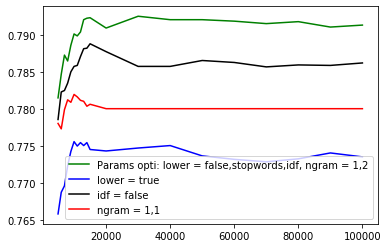

In [129]:
#influence de minuscule
fig = plt.figure()
ax = plt.subplot()
ax.plot(sizeDics,a,color='green',label='Params opti: lower = false,stopwords,idf, ngram = 1,2')
ax.plot(sizeDics,b,color='blue',label='lower = true ')
ax.plot(sizeDics,c,color='black',label='idf = false')
ax.plot(sizeDics,d,color='red',label='ngram = 1,1')
ax.legend()
plt.savefig("fig0")

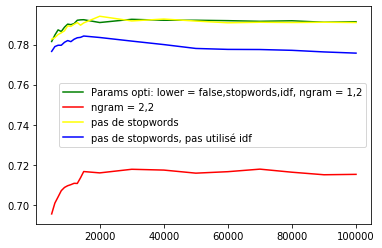

In [130]:
#influence de use_idf
fig = plt.figure()
ax = plt.subplot()
ax.plot(sizeDics,a,color='green',label='Params opti: lower = false,stopwords,idf, ngram = 1,2')
ax.plot(sizeDics,e,color='red',label='ngram = 2,2')
ax.plot(sizeDics,f,color='yellow',label='pas de stopwords')
ax.plot(sizeDics,g,color='blue',label='pas de stopwords, pas utilisé idf')
ax.legend()
plt.savefig("fig1")

In [123]:
#Recuperation données movies

import os.path
def readAFile(path):
    text_file = open(path, "r")
    lines = text_file.read()
    return lines
    
    
    
path = "./movies1000/"

alltxts= [] # init vide
labs = []
cpt = 0
for cl in os.listdir(path): # parcours des fichiers d'un répertoire
    print(cl)
    for f in os.listdir(path+cl):
        txt = readAFile(path+cl+'/'+f)
        alltxts.append(txt)
        labs.append(cpt)

    cpt += 1
    print(len(alltxts))
print(len(alltxts))
#print(len(alltxts_movie))0 pour neg et 1 pour pos

sizeDics=[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
#sizeDics=[5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,20000,30000,40000,50000]
a = []
b = []
c = []
d = []
e=[]
f=[]
g=[]
for i in sizeDics:
    a.append(proccessing(alltxts,lower=True,ngram1=2,ngram2=2,sizeDic = i,liste =None,idf=False))
    b.append(proccessing(alltxts,lower=False,ngram1=2,ngram2=2,sizeDic = i,liste =None,idf=False))
    c.append(proccessing(alltxts,lower=True,ngram1=2,ngram2=2,sizeDic = i,liste =None,idf=True))
    d.append(proccessing(alltxts,lower=True,ngram1=1,ngram2=1,sizeDic = i,liste =None,idf=False))
    e.append(proccessing(alltxts,lower=True,ngram1=1,ngram2=2,sizeDic = i,liste =None,idf=False))
    f.append(proccessing(alltxts,lower=True,ngram1=2,ngram2=2,sizeDic = i,liste =list_stopwords_english,idf=False))
    g.append(proccessing(alltxts,lower=True,ngram1=2,ngram2=2,sizeDic = i,liste =list_stopwords_english,idf=True))
    
"""
fig = plt.figure()
ax = plt.subplot()

ax.plot(sizeDics,a,color='green',label='lower = true,ngram = 1,1')
ax.plot(sizeDics,b,color='blue',label='lower = false,ngram = 1,1')
ax.plot(sizeDics,c,color='black',label='lower = true,ngram = 2,2')
ax.plot(sizeDics,d,color='red',label='lower = false,ngram = 2,2')
ax.plot(sizeDics,e,color='yellow',label='lower = false,ngram = 2,2,use_idf=True')
ax.plot(sizeDics,f,color='purple',label='lower = false,ngram = 1,2')
ax.plot(sizeDics,g,color='grey',label='lower = false,ngram = 1,2,no stopwords')

ax.legend()"""

#plt.savefig("aaa")
#proccessing(alltxts,lower=False)

neg
1000
pos
2000
2000


"\nfig = plt.figure()\nax = plt.subplot()\n\nax.plot(sizeDics,a,color='green',label='lower = true,ngram = 1,1')\nax.plot(sizeDics,b,color='blue',label='lower = false,ngram = 1,1')\nax.plot(sizeDics,c,color='black',label='lower = true,ngram = 2,2')\nax.plot(sizeDics,d,color='red',label='lower = false,ngram = 2,2')\nax.plot(sizeDics,e,color='yellow',label='lower = false,ngram = 2,2,use_idf=True')\nax.plot(sizeDics,f,color='purple',label='lower = false,ngram = 1,2')\nax.plot(sizeDics,g,color='grey',label='lower = false,ngram = 1,2,no stopwords')\n\nax.legend()"

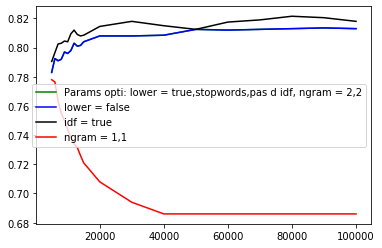

In [124]:
#influence de minuscule
fig = plt.figure()
ax = plt.subplot()
ax.plot(sizeDics,a,color='green',label='Params opti: lower = true,stopwords,pas d idf, ngram = 2,2')
ax.plot(sizeDics,b,color='blue',label='lower = false ')
ax.plot(sizeDics,c,color='black',label='idf = true')
ax.plot(sizeDics,d,color='red',label='ngram = 1,1')
ax.legend()
plt.savefig("fig2")

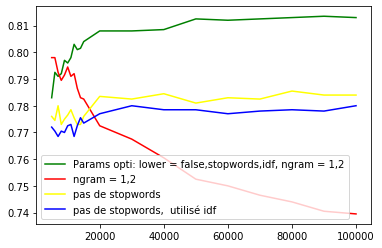

In [125]:
#influence de use_idf
fig = plt.figure()
ax = plt.subplot()
ax.plot(sizeDics,a,color='green',label='Params opti: lower = false,stopwords,idf, ngram = 1,2')
ax.plot(sizeDics,e,color='red',label='ngram = 1,2')
ax.plot(sizeDics,f,color='yellow',label='pas de stopwords')
ax.plot(sizeDics,g,color='blue',label='pas de stopwords,  utilisé idf')
ax.legend()
plt.savefig("fig3")

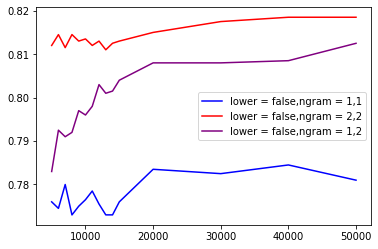

In [97]:
#influence de ngram
fig = plt.figure()
ax = plt.subplot()
ax.plot(sizeDics,b,color='blue',label='lower = false,ngram = 1,1')
ax.plot(sizeDics,d,color='red',label='lower = false,ngram = 2,2')
ax.plot(sizeDics,f,color='purple',label='lower = false,ngram = 1,2')
ax.legend()
plt.savefig("fig2")

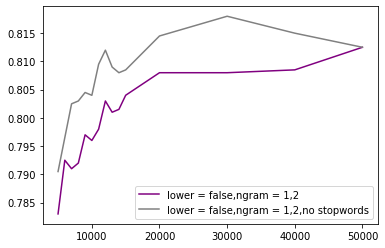

In [98]:
#influence de stopwords
fig = plt.figure()
ax = plt.subplot()
ax.plot(sizeDics,f,color='purple',label='lower = false,ngram = 1,2')
ax.plot(sizeDics,g,color='grey',label='lower = false,ngram = 1,2,no stopwords')
ax.legend()
plt.savefig("fig3")